In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [96]:
x = pd.read_csv('Linear_X_Train.csv')
y = pd.read_csv('Linear_Y_Train.csv')
x_test=pd.read_csv('Linear_X_Test.csv')
x_test=np.array(x_test)
x=(x-x.mean())/x.std()

x=np.array(x)
y=np.array(y)



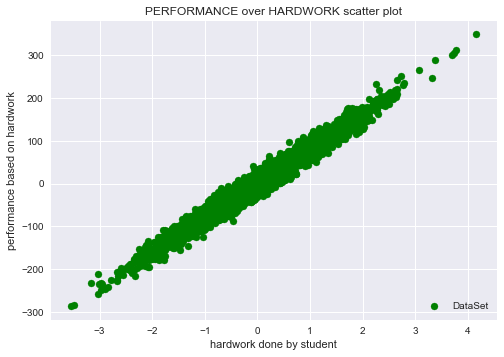

In [97]:
plt.xlabel('hardwork done by student')
plt.ylabel('performance based on hardwork')
plt.title('PERFORMANCE over HARDWORK scatter plot')
plt.scatter(x,y, color = 'green',label = 'DataSet')
plt.legend(loc = "lower right")
plt.show()

In [98]:
def hypothesis(x,theta):
    return theta[0] + theta[1]*x

In [99]:
def gradient(X,Y,theta):
    y_predicted=[]
    grad = np.zeros((2,))
    m = X.shape[0]
    for i in range(m):
        hx = hypothesis(X[i],theta)
        grad[0] +=  (hx-Y[i])
        grad[1] += (hx-Y[i])*X[i]
    return grad

In [100]:
def error(X,Y,theta):
    error=0.0
    m=X.shape[0]
    for i in range(m):
        hx=hypothesis(X[i],theta)
        error+=(hx-Y[i])**2
    return(error/m)

In [101]:
# def gradientDescent(X,Y,learning_rate=0.1):
    
#     theta = np.array([0.0,0.0])
    
#     itr = 0
#     max_itr = 100
    
#     error_list = []
#     theta_list = []
#     y_pred=[]
#     while(itr<=max_itr):
#         grad= gradient(X,Y,theta)
#         e = error(X,Y,theta)
#         error_list.append(e)
        
#         theta_list.append((theta[0],theta[1]))
#         theta[0] = theta[0] - learning_rate*grad[0]
#         theta[1] = theta[1] - learning_rate*grad[1]
        
        
#         itr += 1
        
    
#     return theta,error_list,theta_list

In [102]:
def hypothesis(x,theta):
    #here theta = theta[0] or c ,theta[1] or m ,where y = mx+c
    y_ = theta[0] + theta[1] * x
    return y_

# this functions is used to find the partial derivates
#grad[0] = will represent the partial derivative of loss function w.r.t theta[0]
#grad[1] = will represent the partial derivative of loss function w.r.t theta[1]
def gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        x = X[i]
        y_ = hypothesis(x,theta)
        y = Y[i]
        grad[0] += (y_ - y)
        grad[1] += (y_ - y)*x
    
    return grad/m

# this will used find the error in the predicted value over actual value
def error(X,Y,Theta):
    m = X.shape[0]
    theta = np.zeros((2,))
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        total_error +=  (y_ - Y[i]) ** 2
        
    return total_error/m

# used to optimized the regression line to get the best fit
def gradientDescent(X,Y, learning_rate = 0.1, max_steps = 100):
    theta = np.zeros((2,))
    error_list = []
    for i in range(max_steps):
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        theta[0] = theta[0] - learning_rate * grad[0]
        theta[1] = theta[1] - learning_rate * grad[1]
    
    return theta,error_list

In [103]:
final_theta, error_list= gradientDescent(x,y)

In [104]:
y_predicted_train=hypothesis(x,final_theta)

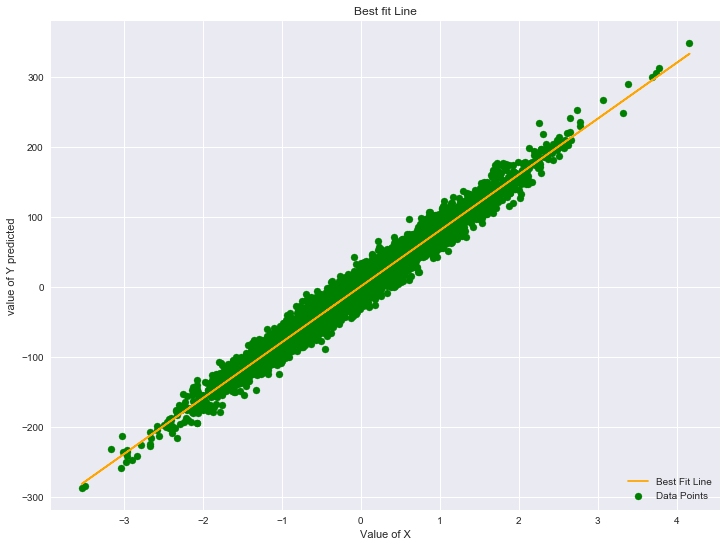

In [105]:
plt.figure(figsize = (12,9))
plt.scatter(x,y,color = "green",label = "Data Points")
plt.plot(x,y_predicted_train,color = "orange",label = "Best Fit Line")
plt.legend(loc = "lower right")
plt.xlabel('Value of X')
plt.ylabel('value of Y predicted')
plt.title('Best fit Line')
plt.show()

In [106]:
y_predicted=hypothesis(x_test,final_theta)

In [107]:
print(y_predicted)

[[-149.39069522]
 [ -68.76419531]
 [-201.51381591]
 ...
 [  10.91350164]
 [ -21.5353186 ]
 [ -53.69184664]]


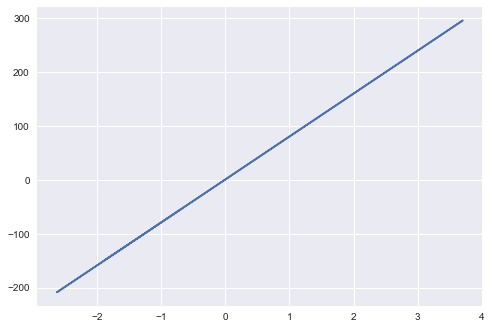

In [108]:
plt.plot(x_test,y_predicted)

In [109]:
df = pd.DataFrame(y_predicted,columns =["y"])

# saving the dataframe
df.to_csv('file1.csv',index=False)